```
Student-1
Name: Md.Abdulla Al Mamun
ID# 20-44192-2
```

```
Student-2
Name: Md.Shafiur Rahman
ID# 20-44191-2
```



*   Mount your google drive.



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import necessary libraries.



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [37]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AQI and Lat Long of Countries.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [38]:
df.info()
df.isna().sum()

x = df["Country"].mode()[0]
df["Country"].fillna(x, inplace = True)
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIn

0

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task.

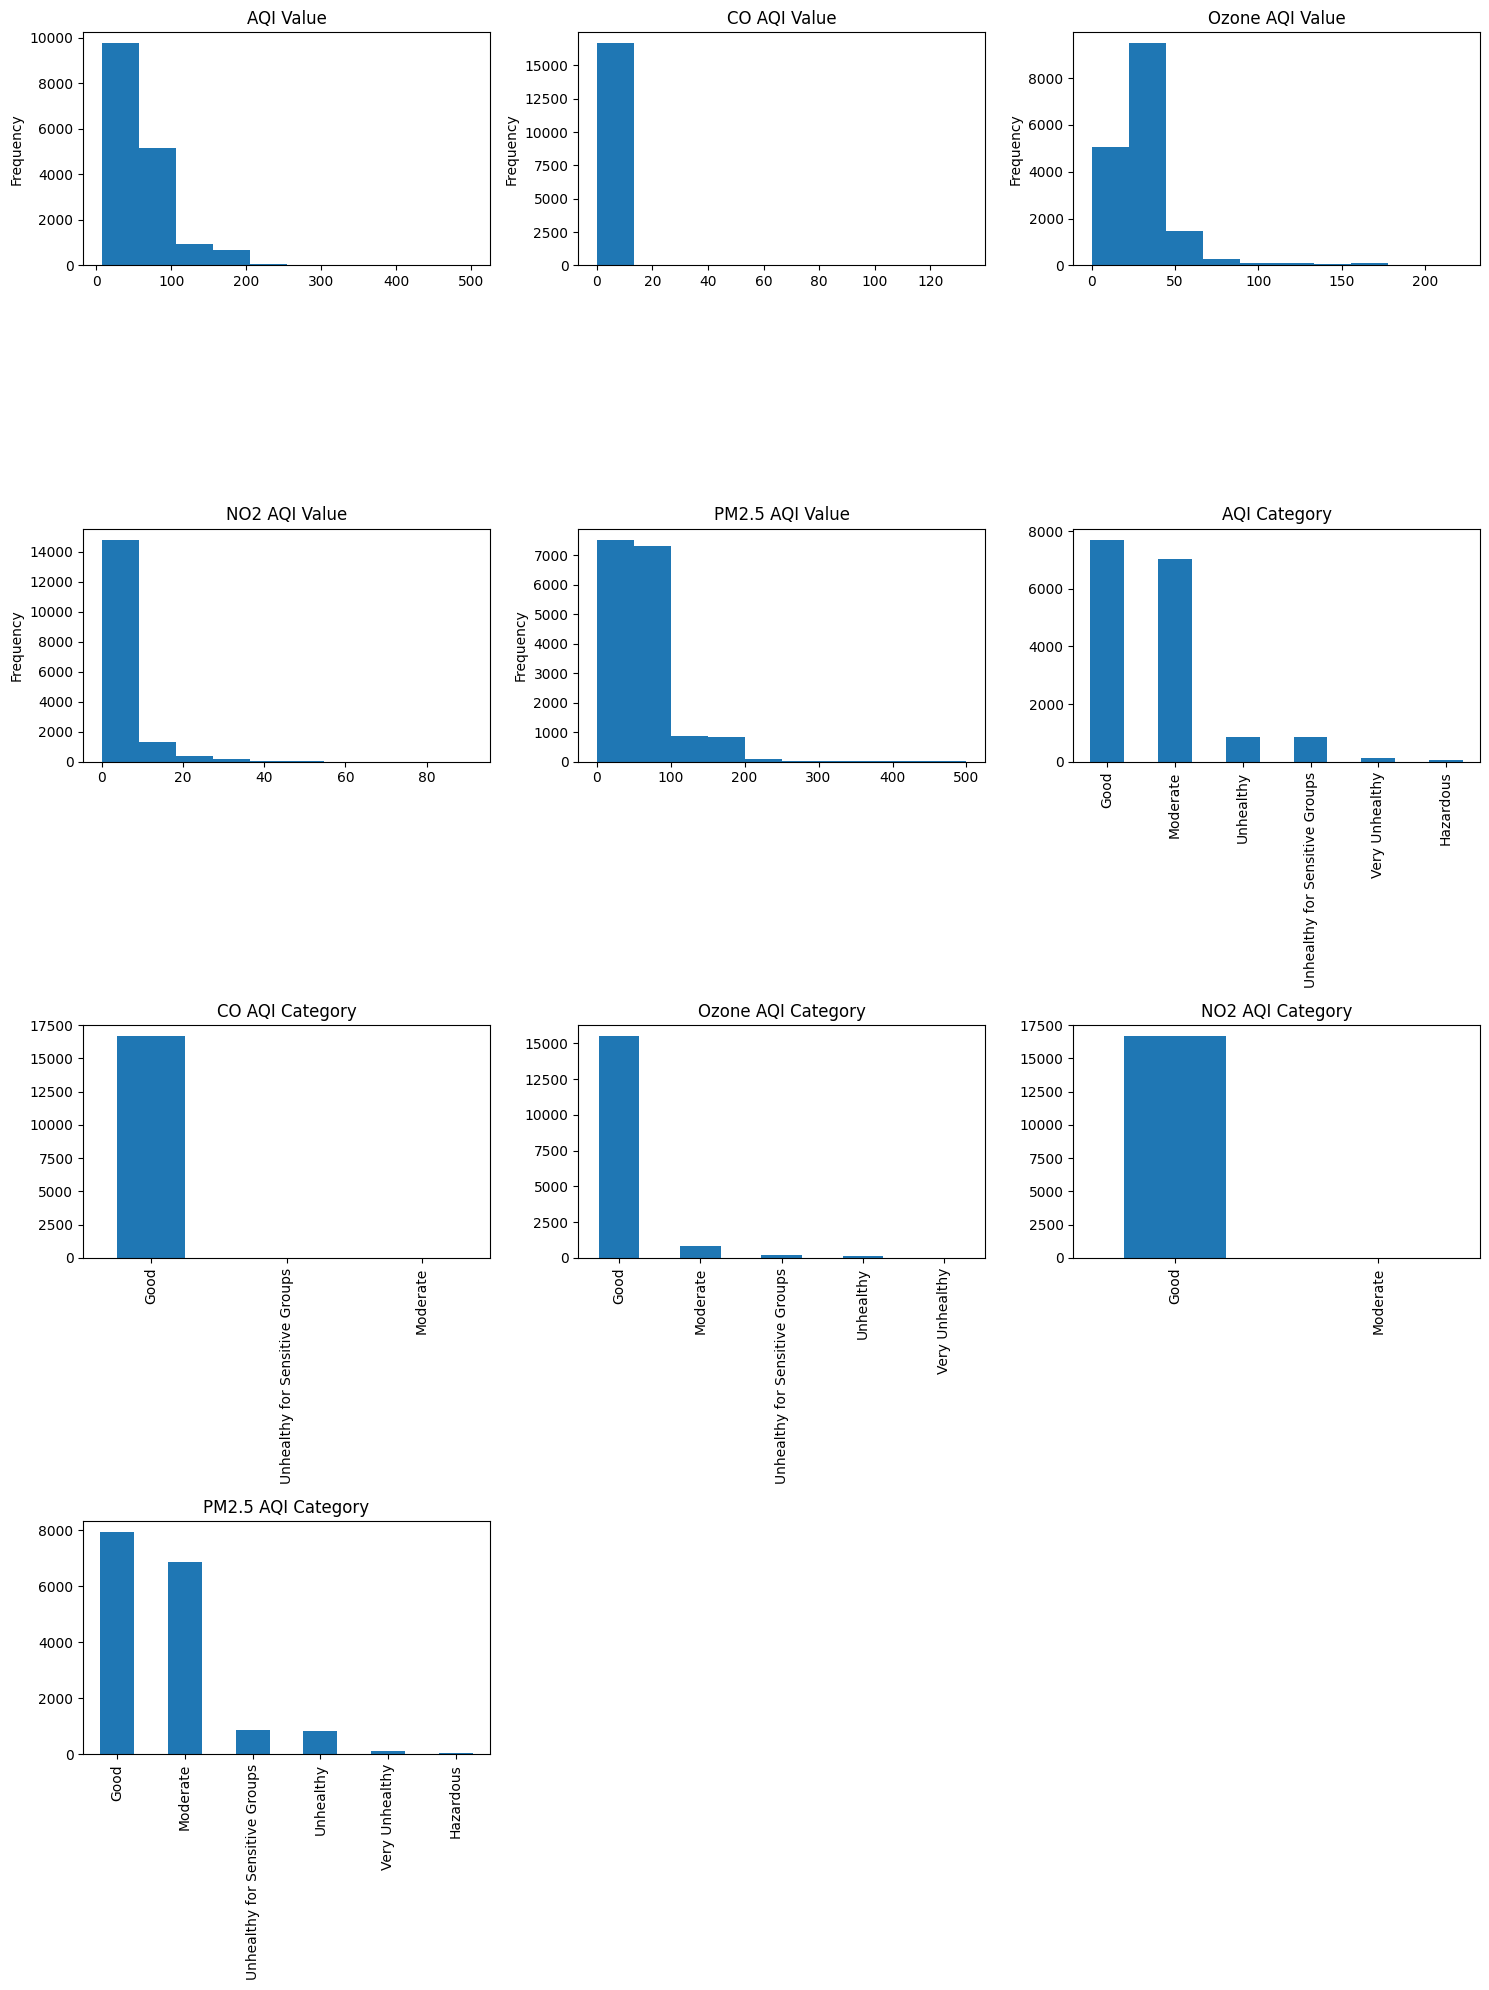

In [39]:
numerical_columns =['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
categorical_columns =['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']
num_plots = len(numerical_columns) + len(categorical_columns)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten() if rows > 1 else [axs]

for i, column in enumerate(numerical_columns):
    ax = axs[i]
    df[column].plot(kind='hist', ax=ax, title=column)

for i, column in enumerate(categorical_columns, start=len(numerical_columns)):
    ax = axs[i]
    df[column].value_counts().plot(kind='bar', ax=ax, title=column)

for i in range(num_plots, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task.

In [41]:
LE = LabelEncoder()
df['Country'] = LE.fit_transform(df['Country'])
df['City'] = LE.fit_transform(df['City'])
df['AQI Category'] = LE.fit_transform(df['AQI Category'])
df['NO2 AQI Category'] = LE.fit_transform(df['NO2 AQI Category'])
df['CO AQI Category'] = LE.fit_transform(df['CO AQI Category'])
df['Ozone AQI Category'] = LE.fit_transform(df['Ozone AQI Category'])
df['PM2.5 AQI Category'] = LE.fit_transform(df['PM2.5 AQI Category'])
df.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,22,10140,41,0,1,0,5,0,1,0,41,0,-11.2958,-41.9869
3,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
4,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833


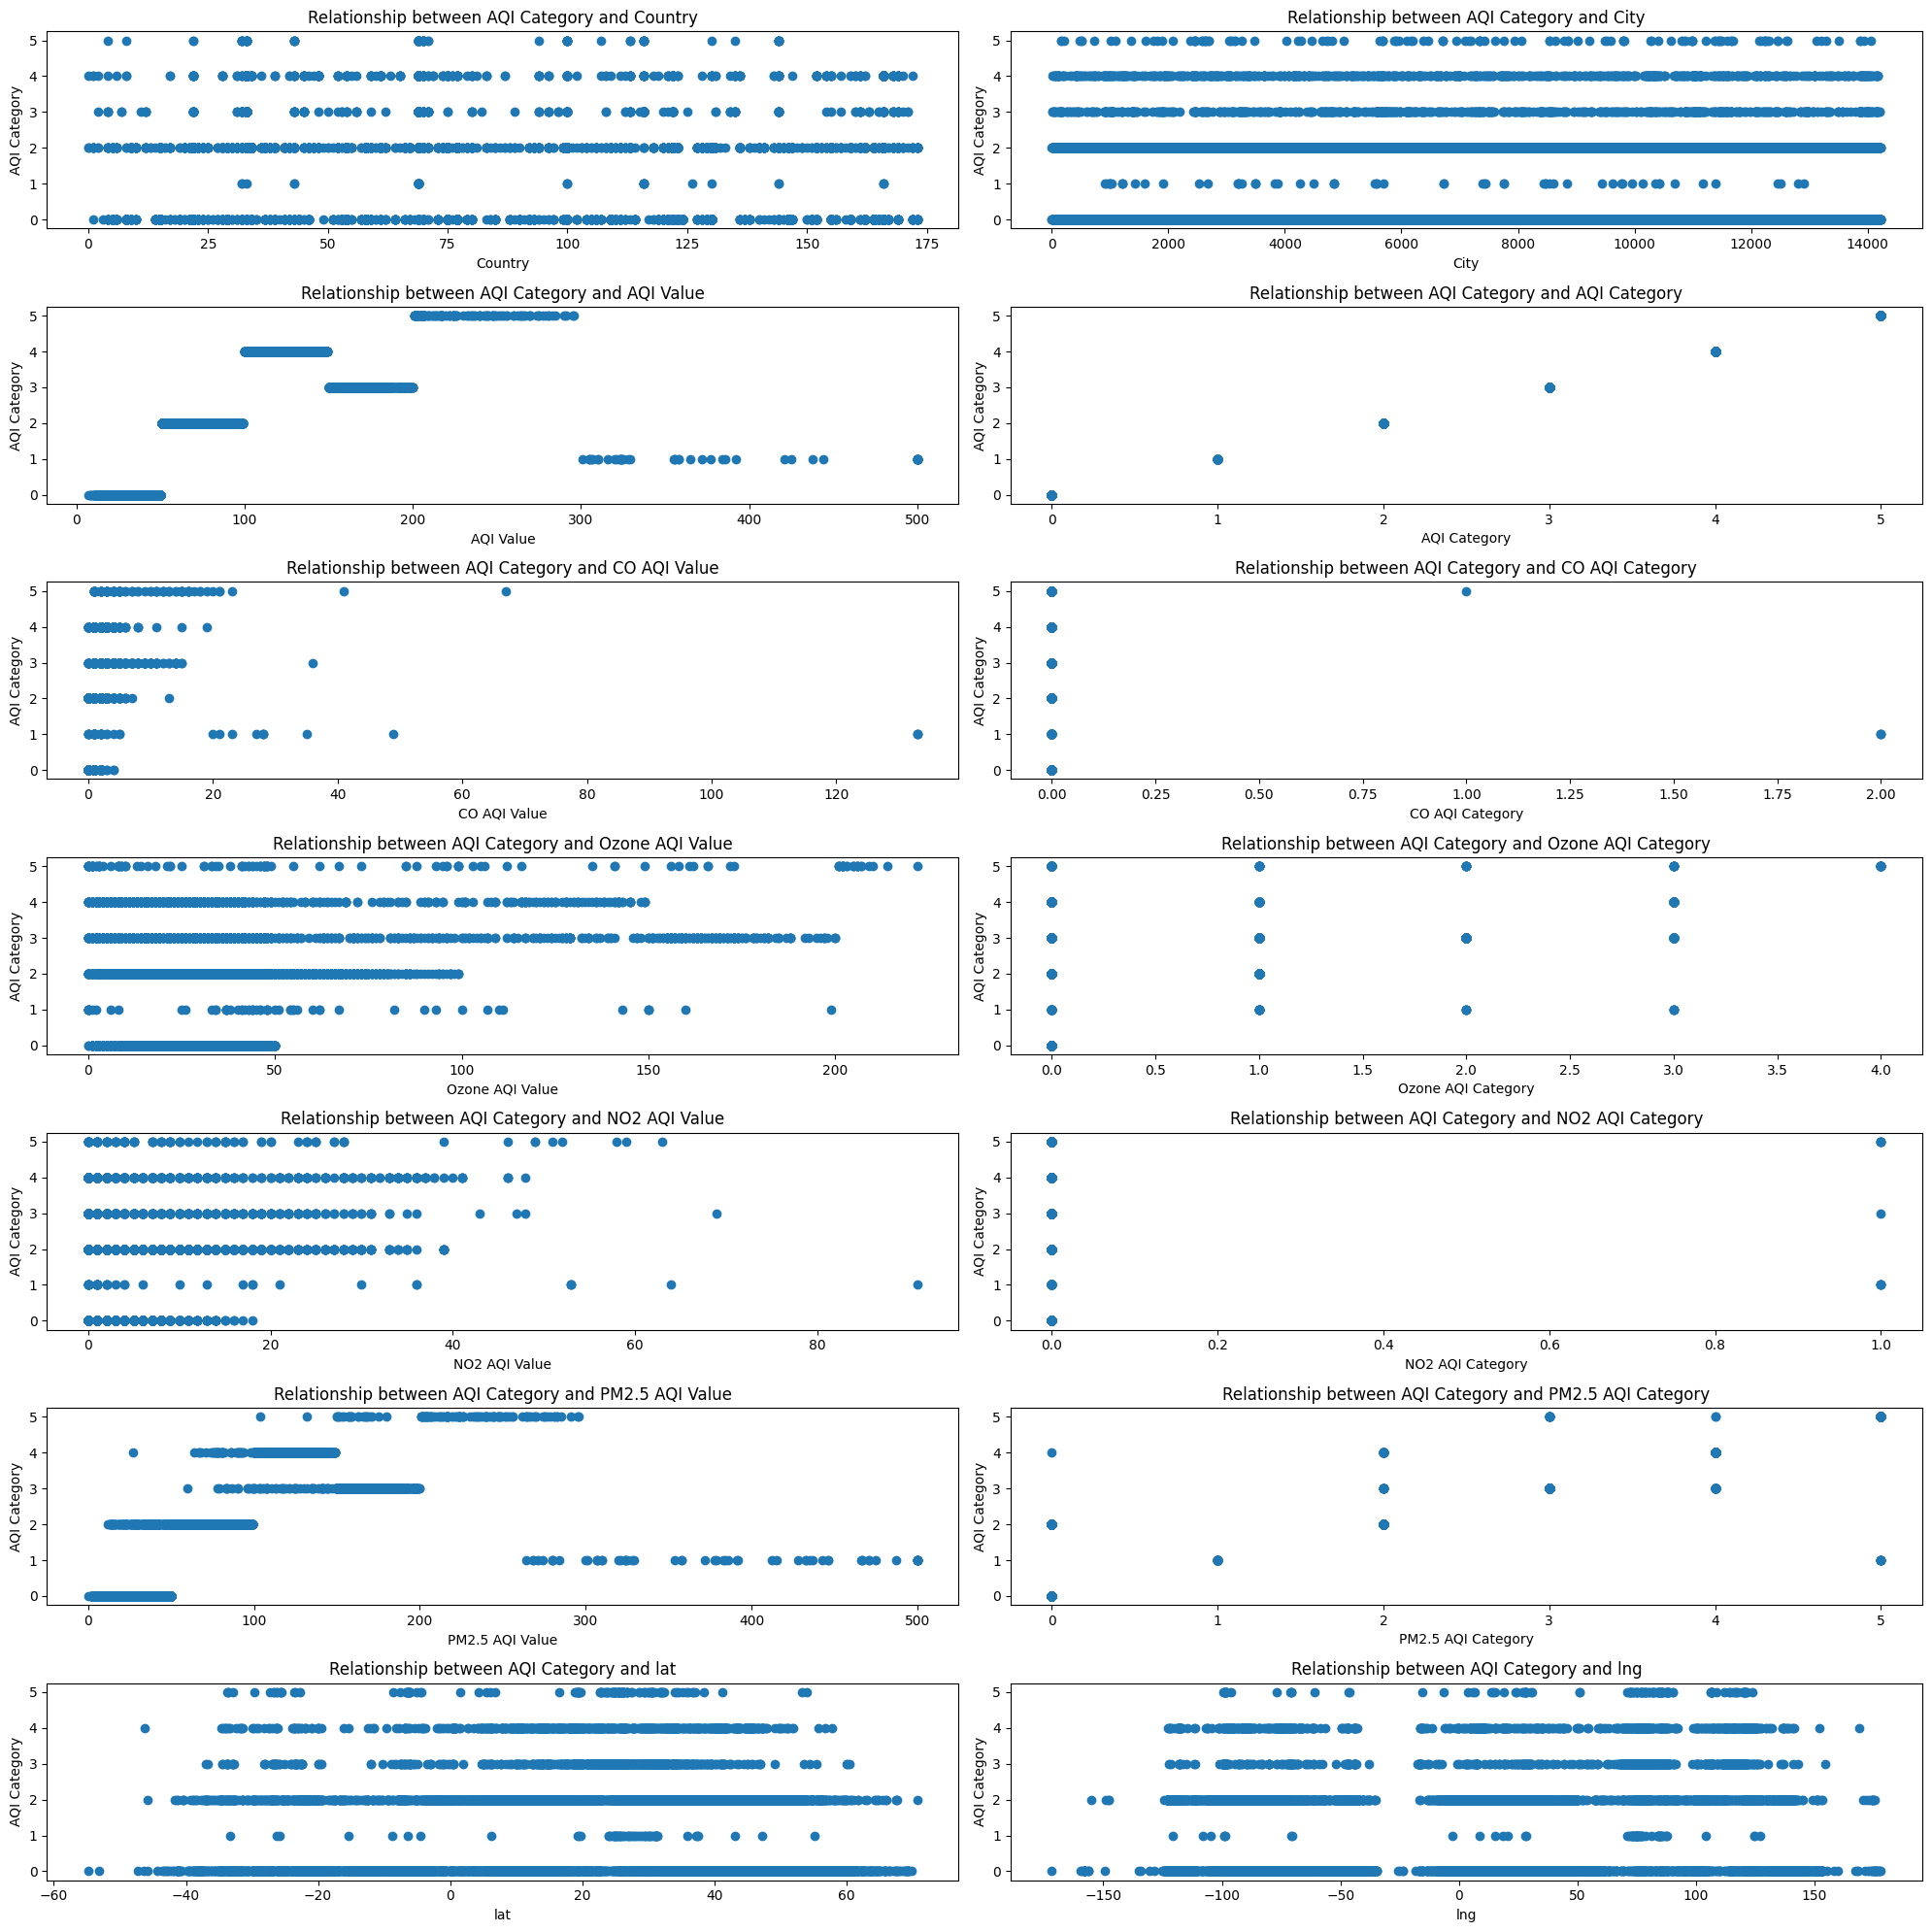

In [43]:
numerical_columns1= df.drop(['AQI Category'], axis=1)

numerical_columns1 = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

target_column = 'AQI Category'

plt.figure(figsize=(20, 20))

num_plots = len(numerical_columns1)

for i, column in enumerate(numerical_columns1):
    plt.subplot((num_plots // 2) + (num_plots % 2), 2, i+1)
    plt.scatter(df[column], df[target_column])
    plt.title(f'Relationship between {target_column} and {column}')
    plt.xlabel(column)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()

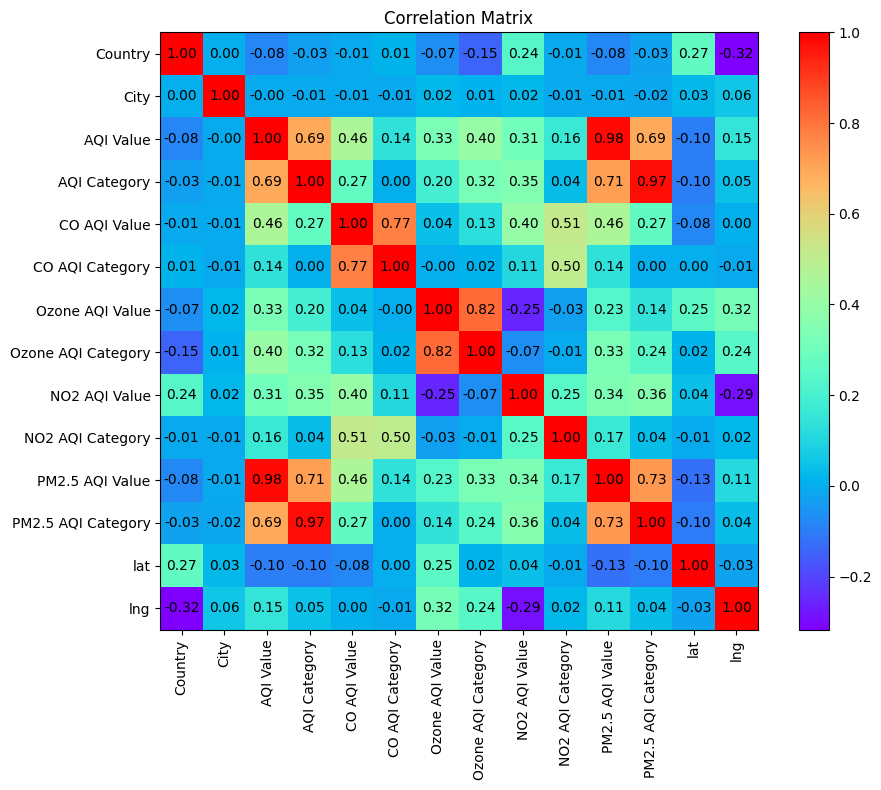

In [44]:

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(corr_matrix, cmap='rainbow', interpolation='nearest')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.colorbar(heatmap)
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.index)
plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [45]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,22,10140,41,0,1,0,5,0,1,0,41,0,-11.2958,-41.9869
3,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
4,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833


In [46]:
categorical_columns1 =['Country','City','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']
LE = LabelEncoder()
for col in categorical_columns:
    df[col] = LE.fit_transform(df[col])
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[categorical_columns1] = scaler.fit_transform(df[categorical_columns1])

df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,0.481230,0.724666,-0.278452,2,-0.144283,-0.015027,0.185328,-0.238136,-0.649544,-0.025677,-0.204164,0.610967,44.7444,44.2031
1,-1.519688,0.728078,-0.510521,0,-0.144283,-0.015027,-1.172020,-0.238136,-0.479491,-0.025677,-0.435608,-0.959486,-5.2900,-44.4900
2,-1.519688,0.728078,-0.510521,0,-0.144283,-0.015027,-1.172020,-0.238136,-0.479491,-0.025677,-0.435608,-0.959486,-11.2958,-41.9869
3,-0.537756,0.733682,0.069651,2,-0.144283,-0.015027,0.316684,-0.238136,-0.309437,-0.025677,0.143002,0.610967,37.1667,15.1833
4,0.351541,0.739043,-0.672969,0,-0.144283,-0.015027,0.097757,-0.238136,-0.649544,-0.025677,-0.921640,-0.959486,53.0167,20.8833


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [47]:
X = df.drop(['AQI Category'], axis=1)
y = df['AQI Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13356, 13), (3339, 13), (13356,), (3339,))

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Model accuracy score: 0.9931
Training-set accuracy score: 0.9960
Training set score: 0.9960
Test set score: 0.9931


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

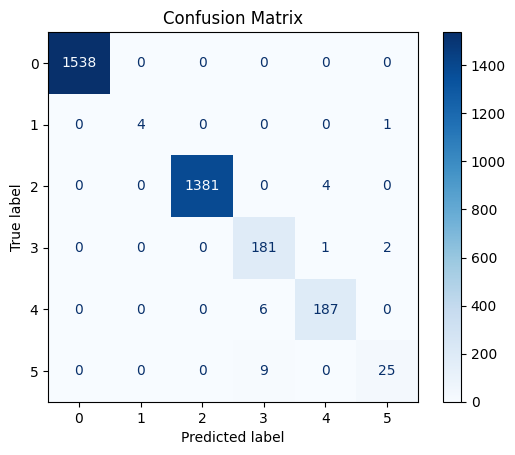

In [50]:
conf_matrix = cm(y_test, y_pred)
unique_labels = sorted(set(y_test + y_pred))  # Get unique labels from y_test and y_pred

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Accuracy: 0.9931117100928422
Precision: 0.9650474773242631
Recall: 0.9141689333794697
F1 Score: 0.9363257534283466


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [52]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(gnb, X, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.98922156 0.99700599 0.98443114 0.98802395 0.9760479  0.9892151
 0.99101258 0.98502097 0.98621929 0.98022768]
Average CV Score:  0.9866426165045583
Number of CV Scores used in Average:  10
